In [7]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pokemon-images-and-types/pokemon.csv
/kaggle/input/pokemon-images-and-types/images/throh.png
/kaggle/input/pokemon-images-and-types/images/samurott.png
/kaggle/input/pokemon-images-and-types/images/venomoth.png
/kaggle/input/pokemon-images-and-types/images/latios.png
/kaggle/input/pokemon-images-and-types/images/shinx.png
/kaggle/input/pokemon-images-and-types/images/durant.png
/kaggle/input/pokemon-images-and-types/images/primarina.png
/kaggle/input/pokemon-images-and-types/images/geodude.png
/kaggle/input/pokemon-images-and-types/images/popplio.png
/kaggle/input/pokemon-images-and-types/images/wingull.png
/kaggle/input/pokemon-images-and-types/images/miltank.png
/kaggle/input/pokemon-images-and-types/images/castform.png
/kaggle/input/pokemon-images-and-types/images/squirtle.png
/kaggle/input/pokemon-images-and-types/images/shaymin-land.png
/kaggle/input/pokemon-images-and-types/images/raikou.png
/kaggle/input/pokemon-images-and-types/images/guzzlord.png
/kaggle/input/po

Found 733 images belonging to 1 classes.
Found 284 images belonging to 1 classes.
Found 160 images belonging to 1 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py:27: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored

23/23 ━━━━━━━━━━━━━━━━━━━━ 25s 924ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 22s 909ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 22s 904ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 40s 881ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 22s 913ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 22s 897ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 9/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 23s 930ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 10/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 23s 920ms/ste

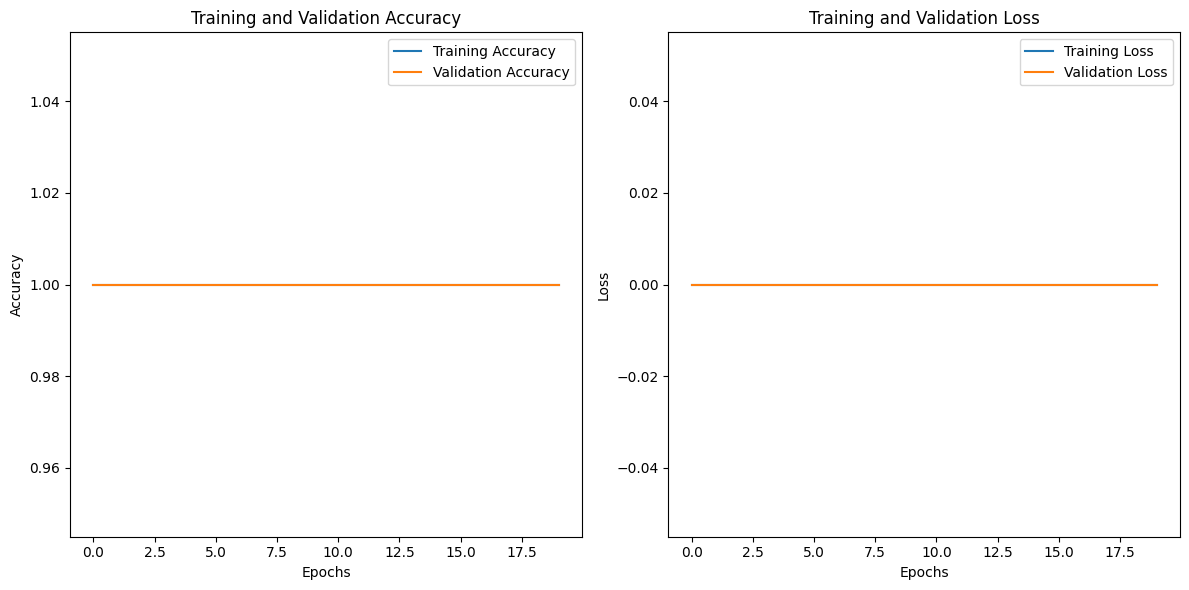

In [17]:
import os
import shutil
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Define paths
dataset_path = "/kaggle/input/pokemon-images-and-types"
train_dir = "/kaggle/working/dataset/train"
val_dir = "/kaggle/working/dataset/val"
test_dir = "/kaggle/working/dataset/test"

# Create directories for train, val, and test datasets
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Organize dataset into train, val, and test directories
classes = os.listdir(dataset_path)
for class_name in classes:
    class_path = os.path.join(dataset_path, class_name)
    if os.path.isdir(class_path):  # Ensure it's a directory
        images = os.listdir(class_path)
        num_images = len(images)
        train_split = int(0.7 * num_images)
        val_split = int(0.2 * num_images)

        train_images = images[:train_split]
        val_images = images[train_split:train_split + val_split]
        test_images = images[train_split + val_split:]

        for subdir, img_list in zip([train_dir, val_dir, test_dir], [train_images, val_images, test_images]):
            class_subdir = os.path.join(subdir, class_name)
            os.makedirs(class_subdir, exist_ok=True)
            for img in img_list:
                shutil.copy(os.path.join(class_path, img), os.path.join(class_subdir, img))

# Parameters
img_height, img_width = 150, 150
batch_size = 32
epochs = 20

# Data preprocessing
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'  # Adjusted to match the number of classes
)

val_data = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

# Dynamically determine the number of classes
num_classes = train_data.num_classes

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=epochs,
    batch_size=batch_size
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_data)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Plot training and validation accuracy and loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.
Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Training Epoch 1/5: 100%|██████████| 36/36 [07:36<00:00, 12.67s/it]


Epoch 1/5, Train Loss: 0.0000, Val Loss: 0.0000


Training Epoch 2/5: 100%|██████████| 36/36 [07:29<00:00, 12.49s/it]


Epoch 2/5, Train Loss: 0.0000, Val Loss: 0.0000


Training Epoch 3/5: 100%|██████████| 36/36 [07:28<00:00, 12.45s/it]


Epoch 3/5, Train Loss: 0.0000, Val Loss: 0.0000


Training Epoch 4/5: 100%|██████████| 36/36 [07:31<00:00, 12.55s/it]


Epoch 4/5, Train Loss: 0.0000, Val Loss: 0.0000


Training Epoch 5/5: 100%|██████████| 36/36 [07:32<00:00, 12.58s/it]


Epoch 5/5, Train Loss: 0.0000, Val Loss: 0.0000
Test Loss: 0.0000, Test Accuracy: 1.0000


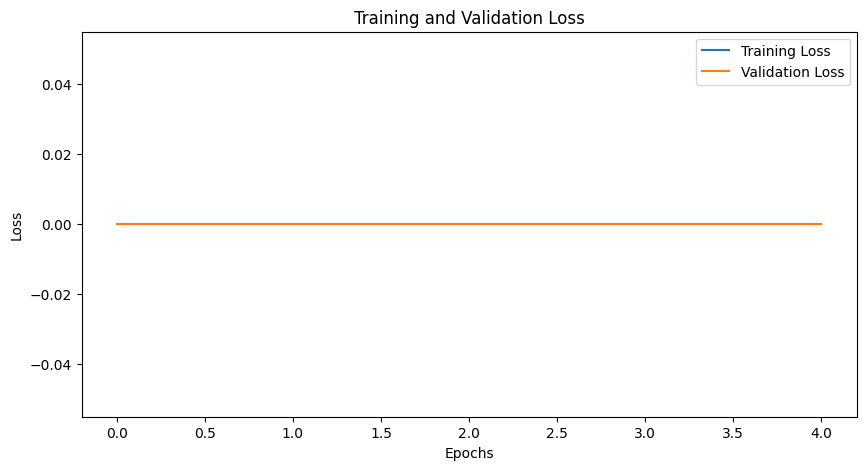

In [5]:
import os
import torch
from transformers import ViTForImageClassification, AutoImageProcessor
from torch.utils.data import DataLoader
from torchvision.transforms import Compose, Resize, Normalize, ToTensor
from torch.optim import AdamW
from torch.nn import CrossEntropyLoss
from tqdm import tqdm
import matplotlib.pyplot as plt
from PIL import Image
import shutil
import random

# Define paths
dataset_path = "/kaggle/input/pokemon-images-and-types"
train_dir = "/kaggle/working/dataset/train"
val_dir = "/kaggle/working/dataset/val"
test_dir = "/kaggle/working/dataset/test"

# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define model name and parameters
model_name = "google/vit-base-patch16-224-in21k"
img_size = 224
batch_size = 16
epochs = 5
learning_rate = 1e-4

# Preprocessing function using Hugging Face's AutoImageProcessor
processor = AutoImageProcessor.from_pretrained(model_name)
transform = Compose([
    Resize((img_size, img_size)),  # Resize image to the desired size
    ToTensor(),                    # Convert image to tensor
    Normalize(mean=processor.image_mean, std=processor.image_std)  # Normalize
])

# Dataset preparation (adapted to PyTorch DataLoader)
def preprocess_images(image_dir):
    data = []
    labels = []
    class_names = sorted(os.listdir(image_dir))
    class_to_idx = {cls_name: idx for idx, cls_name in enumerate(class_names)}

    for cls_name in class_names:
        cls_path = os.path.join(image_dir, cls_name)
        if os.path.isdir(cls_path):
            for img_name in os.listdir(cls_path):
                img_path = os.path.join(cls_path, img_name)
                data.append(img_path)
                labels.append(class_to_idx[cls_name])

    return data, labels, class_to_idx

# Dataset class
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, image_paths, labels, transform=None):
        self.image_paths = image_paths
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image_path = self.image_paths[idx]
        label = self.labels[idx]

        # Open image with PIL
        image = Image.open(image_path).convert("RGB")

        # Apply transformation
        if self.transform:
            image = self.transform(image)

        return {
            'pixel_values': image,
            'labels': torch.tensor(label, dtype=torch.long)
        }

# Move images to appropriate directories
def move_images_to_directories(source_dir, train_dir, val_dir, test_dir, split_ratio=0.8):
    class_names = sorted(os.listdir(source_dir))
    for class_name in class_names:
        class_path = os.path.join(source_dir, class_name)
        if os.path.isdir(class_path):
            images = os.listdir(class_path)
            random.shuffle(images)
            split_index = int(len(images) * split_ratio)
            train_images = images[:split_index]
            val_images = images[split_index:]

            # Move images to train and val directories
            for img in train_images:
                os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
                shutil.move(os.path.join(class_path, img), os.path.join(train_dir, class_name, img))
            for img in val_images:
                os.makedirs(os.path.join(val_dir, class_name), exist_ok=True)
                shutil.move(os.path.join(class_path, img), os.path.join(val_dir, class_name, img))

# Prepare the directories (train, val, test) for the dataset
def prepare_directories():
    os.makedirs(train_dir, exist_ok=True)
    os.makedirs(val_dir, exist_ok=True)
    os.makedirs(test_dir, exist_ok=True)

# Move the dataset to the train, val, test directories
prepare_directories()
move_images_to_directories(dataset_path + "/images", train_dir, val_dir, test_dir)

# Dataset preparation
train_images, train_labels, class_to_idx = preprocess_images(train_dir)
val_images, val_labels, _ = preprocess_images(val_dir)
test_images, test_labels, _ = preprocess_images(test_dir)
num_classes = len(class_to_idx)

# Create datasets and dataloaders
train_dataset = CustomDataset(train_images, train_labels, transform)
val_dataset = CustomDataset(val_images, val_labels, transform)
test_dataset = CustomDataset(test_images, test_labels, transform)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

# Load the pre-trained ViT model
model = ViTForImageClassification.from_pretrained(
    model_name,
    num_labels=num_classes,
    ignore_mismatched_sizes=True
)
model.to(device)

# Optimizer and loss function
optimizer = AdamW(model.parameters(), lr=learning_rate)
criterion = CrossEntropyLoss()

# Training loop
def train_model(model, train_loader, val_loader, epochs):
    model.train()
    train_loss_history = []
    val_loss_history = []
    
    for epoch in range(epochs):
        train_loss = 0.0
        val_loss = 0.0

        # Training phase
        model.train()
        for batch in tqdm(train_loader, desc=f"Training Epoch {epoch + 1}/{epochs}"):
            inputs = batch['pixel_values'].to(device)
            labels = batch['labels'].to(device)

            optimizer.zero_grad()
            outputs = model(pixel_values=inputs).logits
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            train_loss += loss.item() * inputs.size(0)

        train_loss /= len(train_loader.dataset)
        train_loss_history.append(train_loss)

        # Validation phase
        model.eval()
        with torch.no_grad():
            for batch in val_loader:
                inputs = batch['pixel_values'].to(device)
                labels = batch['labels'].to(device)

                outputs = model(pixel_values=inputs).logits
                loss = criterion(outputs, labels)
                val_loss += loss.item() * inputs.size(0)

        val_loss /= len(val_loader.dataset)
        val_loss_history.append(val_loss)

        print(f"Epoch {epoch + 1}/{epochs}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")

    return train_loss_history, val_loss_history

# Training
train_loss, val_loss = train_model(model, train_loader, val_loader, epochs)

# Evaluation
def evaluate_model(model, test_loader):
    model.eval()
    test_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for batch in test_loader:
            inputs = batch['pixel_values'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(pixel_values=inputs).logits
            loss = criterion(outputs, labels)

            test_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = correct / total
    test_loss /= len(test_loader.dataset)

    print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {accuracy:.4f}")
    return test_loss, accuracy

# Evaluate the model
test_loss, test_accuracy = evaluate_model(model, test_loader)

# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(train_loss, label="Training Loss")
plt.plot(val_loss, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training and Validation Loss")
plt.show()
